In [1]:
# login to huggingface and generate api key

import io
import os
import re
import json
import torch
import html
import base64
import itertools

import numpy as np
from IPython.core.display import display, HTML
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AdamW,
    AutoModelForCausalLM,
    AutoProcessor,
    get_scheduler
)
from tqdm import tqdm
from typing import List, Dict, Any, Tuple, Generator
from peft import LoraConfig, get_peft_model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

/tmp/ipykernel_198923/2765166715.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Test custom model 
test_image = 'football_test.jpg'
image = Image.open(test_image)

model_id = '/home/tanmoy/Computer Vision Project/florence-2-fine-tuning/checkpoints/epoch_50'
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


def florence2(task_prompt, images, text_input=None):
    """
    Calling the Microsoft Florence2 model
    """
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        early_stopping=False,
        do_sample=False,
        num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids,
                                            skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height))

    return parsed_answer

In [3]:
task_prompt3 = '<OD>'
od_results = florence2(task_prompt3, image)  
od_results['<OD>']

{'bboxes': [[586.8800048828125,
   585.5999755859375,
   603.5199584960938,
   640.6400146484375],
  [453.7599792480469, 533.1199951171875, 469.1199951171875, 589.4400024414062],
  [608.6400146484375,
   428.1600036621094,
   618.8800048828125,
   476.79998779296875],
  [760.9599609375, 530.5599975585938, 771.2000122070312, 581.760009765625],
  [490.8799743652344, 499.8399963378906, 503.67999267578125, 558.719970703125],
  [853.1199951171875, 512.6400146484375, 869.760009765625, 568.9599609375],
  [608.6400146484375, 580.47998046875, 620.1599731445312, 640.6400146484375],
  [850.5599975585938, 570.239990234375, 863.3599853515625, 629.1199951171875],
  [981.1199951171875, 478.0799865722656, 992.6399536132812, 531.8399658203125],
  [297.6000061035156, 810.8800048828125, 310.3999938964844, 890.239990234375],
  [384.6399841308594, 618.8800048828125, 398.7200012207031, 680.3200073242188],
  [519.0399780273438, 507.5199890136719, 530.5599975585938, 565.1199951171875],
  [659.8399658203125,
 

In [4]:
def plot_bbox(image, data):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

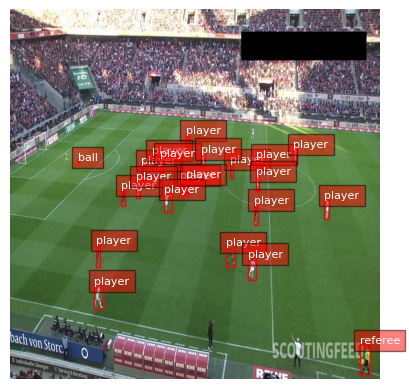

In [5]:
plot_bbox(image, od_results['<OD>']);

In [6]:
# Test custom model 
test_image = 'football_test.jpg'
image = Image.open(test_image)

# model_id = 'microsoft/Florence-2-large'
model_id = 'microsoft/Florence-2-base'

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)




def florence2(task_prompt, images, text_input=None):
    """
    Calling the Microsoft Florence2 model
    """
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        early_stopping=False,
        do_sample=False,
        num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids,
                                            skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height))

    return parsed_answer

/home/tanmoy/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
task_prompt3 = '<OD>'
od_results = florence2(task_prompt3, image)  
od_results['<OD>']

{'bboxes': [[0.6399999856948853,
   0.6399999856948853,
   1278.0799560546875,
   494.7200012207031],
  [0.6399999856948853,
   0.6399999856948853,
   787.8399658203125,
   86.4000015258789],
  [0.6399999856948853, 188.8000030517578, 170.87998962402344, 464.0],
  [137.59999084472656,
   1059.199951171875,
   330.8800048828125,
   1169.280029296875],
  [0.6399999856948853,
   1238.4000244140625,
   357.7599792480469,
   1278.0799560546875],
  [970.8800048828125,
   1127.0399169921875,
   1015.6799926757812,
   1242.239990234375],
  [1207.679931640625, 1161.5999755859375, 1249.919921875, 1269.1199951171875],
  [679.0399780273438,
   1075.8399658203125,
   711.0399780273438,
   1182.0799560546875],
  [287.3599853515625, 954.239990234375, 325.7599792480469, 1038.719970703125],
  [741.760009765625, 818.5599975585938, 782.719970703125, 894.0799560546875],
  [174.72000122070312,
   1125.760009765625,
   205.44000244140625,
   1216.6400146484375],
  [819.8399658203125, 860.7999877929688, 854.3

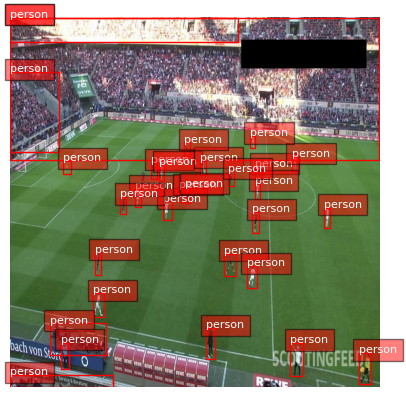

In [8]:
plot_bbox(image, od_results['<OD>']);